# Water quelity prediction version 1

# 1 Check data and drop duplicates
https://www.kaggle.com/competitions/copy-of-drinking-water-quality/leaderboard

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('train.csv')
data.head(10)

,station_id,Aluminium_2019,Aluminium_2020,Ammonium_2019,Ammonium_2020,Boron_2019,Boron_2020,Chloride_2019,Chloride_2020,Coli-like-bacteria-Colilert_2019,...,Taste-ball-units_2020,Taste-dilution-degree_2019,Taste-dilution-degree_2020,Turbidity-NTU_2019,Turbidity-NTU_2020,pH _2019,pH _2020,compliance_2019,compliance_2020,compliance_2021
0,487,NaN,NaN,0.05,0.05,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,1.60,0.2,7.80,7.60,0,0,0
1,1555,NaN,NaN,0.05,0.05,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.00,1.0,7.30,7.10,0,0,0
2,205,NaN,10.0,0.05,0.24,NaN,0.100,NaN,NaN,NaN,...,NaN,1.0,1.0,1.00,1.0,7.80,7.70,0,0,0
3,1228,NaN,NaN,0.09,0.05,0.641,0.932,NaN,NaN,NaN,...,1.0,NaN,NaN,0.50,0.5,7.44,7.58,0,0,0
4,470,NaN,NaN,0.06,0.05,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,0.20,44.0,7.70,8.00,0,1,0
5,614,NaN,NaN,0.12,0.13,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,0.50,0.5,8.64,8.45,0,0,1
6,1420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,1.0,2.0,1.00,1.0,7.50,8.00,0,0,0
7,188,NaN,NaN,0.23,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,0.50,0.5,7.45,7.40,1,1,0
8,1286,NaN,50.0,0.20,0.23,NaN,0.091,NaN,6.5,NaN,...,NaN,NaN,NaN,0.72,0.5,7.50,7.70,1,0,1
9,736,NaN,NaN,0.05,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,0.50,0.5,7.53,7.26,0,0,0


In [3]:
data.drop_duplicates()
data.isna().sum()

station_id                            0
Aluminium_2019                      337
Aluminium_2020                      346
Ammonium_2019                       133
Ammonium_2020                       150
Boron_2019                          324
Boron_2020                          332
Chloride_2019                       329
Chloride_2020                       326
Coli-like-bacteria-Colilert_2019    315
Coli-like-bacteria-Colilert_2020    315
Coli-like-bacteria_2019             118
Coli-like-bacteria_2020             120
Colony-count-at-22-C_2019            70
Colony-count-at-22-C_2020            53
Color-Pt-Co-unit_2019               381
Color-Pt-Co-unit_2020               377
Color-Pt/Co-scale_2019               68
Color-Pt/Co-scale_2020               61
Electrical-conductivity_2019         10
Electrical-conductivity_2020          4
Enterococci_2019                    256
Enterococci_2020                    267
Escherichia-coli-Colilert_2019      316
Escherichia-coli-Colilert_2020      316


In [4]:
data.shape

(440, 58)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 58 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   station_id                        440 non-null    int64  
 1   Aluminium_2019                    103 non-null    float64
 2   Aluminium_2020                    94 non-null     float64
 3   Ammonium_2019                     307 non-null    float64
 4   Ammonium_2020                     290 non-null    float64
 5   Boron_2019                        116 non-null    float64
 6   Boron_2020                        108 non-null    float64
 7   Chloride_2019                     111 non-null    float64
 8   Chloride_2020                     114 non-null    float64
 9   Coli-like-bacteria-Colilert_2019  125 non-null    float64
 10  Coli-like-bacteria-Colilert_2020  125 non-null    float64
 11  Coli-like-bacteria_2019           322 non-null    float64
 12  Coli-lik

## 1.1 Checking for inbalance data

<AxesSubplot:>

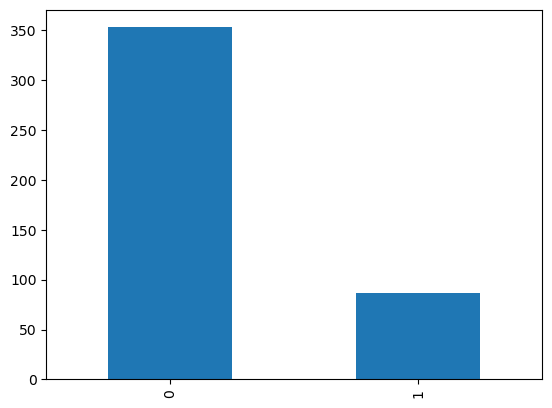

In [6]:
data['compliance_2019'].value_counts().plot(kind='bar')

<AxesSubplot:>

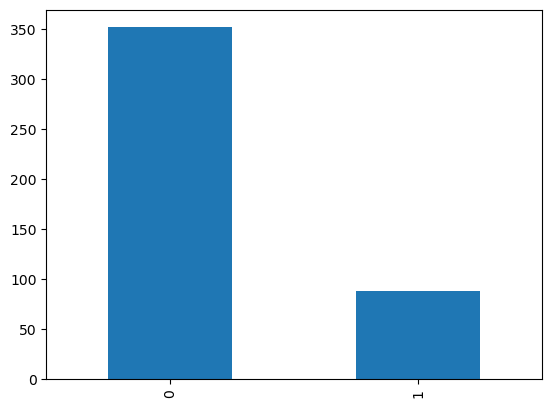

In [7]:
data['compliance_2020'].value_counts().plot(kind='bar')

<AxesSubplot:>

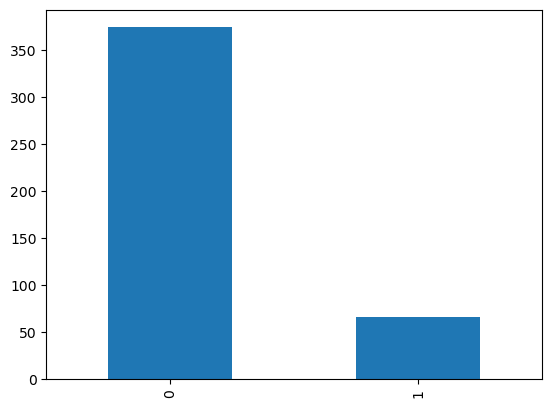

In [8]:
data['compliance_2021'].value_counts().plot(kind='bar')

# 2 Inbalance data training and testing

### 2.1 Prepare data for fiting

In [9]:
X = data.drop(['compliance_2021'],axis=1)
y = data['compliance_2021']

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer.fit(X)

SimpleImputer(strategy='median')

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 7)

In [11]:
from sklearn.impute import SimpleImputer

X_train = pd.DataFrame(imputer.transform(X_train))
X_test = pd.DataFrame(imputer.transform(X_test))

In [12]:
# from sklearn.preprocessing import StandardScaler
# std = StandardScaler()
# std.fit(X_imp_train)

# X_train_std = std.transform(X_imp_train)
# X_test_std = std.transform(X_imp_test)

### 2.2 LogisticRegression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred =lr.predict(X_test)

confusion_matrix_result = confusion_matrix(y_test.values, y_pred)
print("Confusion matrix:\n%s" % confusion_matrix_result)
accuracy_score(y_pred, y_test)



Confusion matrix:
[[75  1]
 [11  1]]


/Users/lunf/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8636363636363636

### 2.3 RandomForestClassifier

In [15]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=8)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

confusion_matrix_result = confusion_matrix(y_test.values, y_pred)
print("Confusion matrix:\n%s" % confusion_matrix_result)

accuracy_score(rfc.predict(X_test), y_test)

Confusion matrix:
[[74  2]
 [12  0]]


0.8409090909090909

### 2.4 KNeighborsClassifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train,y_train)

y_pred = knn.predict(X_test)
confusion_matrix_result = confusion_matrix(y_test.values, y_pred)
print("Confusion matrix:\n%s" % confusion_matrix_result)
accuracy_score(y_test, y_pred)

Confusion matrix:
[[75  1]
 [12  0]]


0.8522727272727273

### 2.5 AdaBoostClassifier

In [19]:
from sklearn.ensemble import AdaBoostClassifier

Adaboost_model=AdaBoostClassifier()
Adaboost_model.fit(X_train,y_train)
y_pred = Adaboost_model.predict(X_test)

confusion_matrix_result = confusion_matrix(y_test.values, y_pred)
print("Confusion matrix:\n%s" % confusion_matrix_result)
accuracy_score(y_test, y_pred)

Confusion matrix:
[[67  9]
 [12  0]]


0.7613636363636364

# 3.Undersampling

undersampling by using compliance_2021

In [20]:
from sklearn.utils import resample
print(data[data['compliance_2021']==0]['compliance_2021'].value_counts())
df_majority = data[data['compliance_2021']==1]
df_minority = data[data['compliance_2021']==0]

df_majority_downsampled = resample(df_majority, 
                                 replace=True,    # sample without replacement
                                 n_samples=374,     # to match minority class
                                 random_state=123) # reproducible results


# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled.sort_index(inplace=True)

y = df_downsampled['compliance_2021']
X = df_downsampled.drop('compliance_2021', axis=1)

0    374
Name: compliance_2021, dtype: int64
0    374
1    374
Name: compliance_2021, dtype: int64


## 3.1 Fit scaled data

In [21]:
train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state=9)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test,
                                                test_size=test_ratio/(test_ratio + validation_ratio), random_state=4) 


# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 7)

In [22]:
# replace nan values with median values by using simpleinputer 
# num_imp = SimpleImputer(strategy = 'median')
# num_imp.fit(X)

# X_imp_train = pd.DataFrame(num_imp.transform(X_train))
# X_imp_test = pd.DataFrame(num_imp.transform(X_test))
# X_imp_val = pd.DataFrame(num_imp.transform(X_val))

# std = StandardScaler()
# std.fit(X_imp_train)

# X_train_std = std.transform(X_imp_train)
# X_test_std = std.transform(X_imp_test)
# X_val_std = std.transform(X_imp_val)
X_train = pd.DataFrame(imputer.transform(X_train))
X_test = pd.DataFrame(imputer.transform(X_test))
X_val= pd.DataFrame(imputer.transform(X_val))

## 3.2 LogisticRegression

In [23]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred =lr.predict(X_test)

confusion_matrix_result = confusion_matrix(y_test.values, y_pred)
print("Confusion matrix:\n%s" % confusion_matrix_result)

print(f'Accuracy of model on the test data {accuracy_score(lr.predict(X_test), y_test)}')
print(f'Accuracy of model on the validation data {accuracy_score(lr.predict(X_val), y_val)}')

Confusion matrix:
[[24  9]
 [22 20]]
Accuracy of model on the test data 0.5866666666666667
Accuracy of model on the validation data 0.7066666666666667


/Users/lunf/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 3.3 RandomForestClassifier

In [24]:
# rfc = RandomForestClassifier(random_state=78, max_features = 1)
rfc = RandomForestClassifier(random_state=8)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

confusion_matrix_result = confusion_matrix(y_test.values, y_pred)
print("Confusion matrix:\n%s" % confusion_matrix_result)
accuracy_score(rfc.predict(X_test), y_test)

print(f'Accuracy of model on the test data {accuracy_score(rfc.predict(X_test), y_test)}')
print(f'Accuracy of model on the validation data {accuracy_score(rfc.predict(X_val), y_val)}')

Confusion matrix:
[[33  0]
 [ 0 42]]
Accuracy of model on the test data 1.0
Accuracy of model on the validation data 0.96


## 3.4 KNeighborsClassifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train,y_train)

y_pred = knn.predict(X_test)
confusion_matrix_result = confusion_matrix(y_test.values, y_pred)
print("Confusion matrix:\n%s" % confusion_matrix_result)
print(f'Accuracy of model on the test data {accuracy_score(knn.predict(X_test), y_test)}')
print(f'Accuracy of model on the validation data {accuracy_score(knn.predict(X_val), y_val)}')

Confusion matrix:
[[24  9]
 [ 4 38]]
Accuracy of model on the test data 0.8266666666666667
Accuracy of model on the validation data 0.7866666666666666


# Results
At this moment we can see that the best is random forest which has unreal results on test and validation set. Do not realy belive that this model even get 70% in kaggle if we send it(ok it got 83, 88). Also KNN has realy good results.

# Save results to csv

In [42]:
test_data = pd.read_csv('test.csv')
test_data.head()

,station_id,Aluminium_2019,Aluminium_2020,Ammonium_2019,Ammonium_2020,Boron_2019,Boron_2020,Chloride_2019,Chloride_2020,Coli-like-bacteria-Colilert_2019,...,Taste-ball-units_2019,Taste-ball-units_2020,Taste-dilution-degree_2019,Taste-dilution-degree_2020,Turbidity-NTU_2019,Turbidity-NTU_2020,pH _2019,pH _2020,compliance_2019,compliance_2020
0,163,5.0,5.0,0.08,0.08,0.071,0.062,130.0,102.0,NaN,...,NaN,NaN,1.0,1.0,1.18,1.90,8.17,8.12,0,0
1,167,NaN,NaN,0.08,0.08,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,3.0,3.90,1.54,7.83,7.81,1,0
2,171,NaN,NaN,NaN,NaN,NaN,NaN,112.0,90.0,NaN,...,NaN,NaN,2.0,1.0,1.40,1.50,7.50,7.60,0,1
3,174,5.0,5.0,0.05,0.09,0.072,0.075,248.0,243.0,0.0,...,NaN,NaN,2.0,8.0,1.00,1.00,7.70,7.80,0,0
4,178,NaN,NaN,0.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,1.00,1.00,7.50,7.40,0,0


In [43]:
# test_data_imp = SimpleImputer(strategy = 'median')
# X = data.drop(['compliance_2021'],axis=1)
# y = data['compliance_2021']

# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy = 'median')
# imputer.fit(X)


test_data_imp.fit(test_data)

test_data_mod = pd.DataFrame(test_data_imp.transform(test_data))

# std = StandardScaler()
# std.fit(X_imp_test_data)

In [44]:
y_pred = rfc.predict(test_data_mod)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0]


In [45]:
df = pd.DataFrame()
df['station_id'] = test_data.station_id
df['compliance_2021'] = y_pred

In [46]:
df.compliance_2021.value_counts()

0    185
1      4
Name: compliance_2021, dtype: int64

In [47]:
df

,station_id,compliance_2021
0,163,0
1,167,0
2,171,0
3,174,0
4,178,0
...,...,...
184,1941,0
185,2087,0
186,2206,1
187,2303,0


In [48]:
df.to_csv('water.csv', index=False)

In [49]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, rfc.predict_proba(X_test_std)[:, 1])

NameError: name 'X_test_std' is not defined